In [116]:
#IMPORTS

import pandas as pd
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.multitest import fdrcorrection


In [117]:
#pull data into dfs from excel
full_analysis_df = pd.read_excel('c:/Users/Hailey Sherman/ClimateOfHopeData/Data_2025/COMBINED_TEXT_jan-june_pre_in-gallery_post_w_SASSY_urban_rural.xlsx')
emotions_mean_by_ida = pd.read_excel('c:/Users/Hailey Sherman/ClimateOfHopeData/Data_2025/emotion_means_by_id.xlsx')
#full_analysis_df = pd.read_excel('c:/Users/u1172791/COH files/Data_2025/COMBINED_TEXT_jan-june_pre_in-gallery_post_w_SASSY_urban_rural.xlsx')
#emotions_mean_by_ida = pd.read_excel('c:/Users/u1172791/COH files/Data_2025/emotion_means_by_id.xlsx')
display(full_analysis_df)

,Unnamed: 0,start_date,end_date,status,ip_address,progress,duration_in_seconds,finished,recorded_date,response_id,...,q49_48,q49_49,q49_50,q51_1,q51_2,q51_3,q51_4,q51_5,q51_6,q51_7
0,0,2024-04-05 14:12:54,2024-04-05 15:57:31,IP Address,155.98.131.1,100.0,6276.0,1.0,2024-04-05 15:57:31,R_2dPUXEtypfBvZhD,...,A little bit,Not at all,Not at all,A lot,A lot,A lot,A lot,A little bit,Moderately,A lot
1,1,2024-03-13 18:59:27,2024-03-13 20:15:18,IP Address,155.98.131.5,100.0,4550.0,1.0,2024-03-13 20:15:19,R_7PAooFY6nTwIqA7,...,A little bit,Not at all,Not at all,A great deal,A great deal,A great deal,Moderately,Not at all,Moderately,A lot
2,2,2024-03-23 13:49:19,2024-04-03 19:27:57,IP Address,155.98.131.5,100.0,970717.0,1.0,2024-04-03 19:27:58,R_73AteLV2ZE5L4GJ,...,A lot,Moderately,A lot,Moderately,A little bit,A little bit,A little bit,A little bit,Moderately,A little bit
3,3,2024-01-26 15:51:59,2024-01-26 16:41:06,IP Address,155.98.131.2,100.0,2946.0,1.0,2024-01-26 16:41:06,R_3uP2DqVWkGDu8La,...,Extremely,Moderately,Not at all,Moderately,A lot,A great deal,Moderately,A little bit,Moderately,Moderately
4,4,2024-01-24 16:32:42,2024-01-24 19:27:07,IP Address,155.98.131.2,100.0,10464.0,1.0,2024-01-24 19:27:07,R_7OiAhfM2TEkyQdM,...,A lot,Moderately,Not at all,Not at all,Not at all,Not at all,Not at all,A little bit,Not at all,Not at all
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,186,2024-04-06 14:34:46,2024-04-06 15:31:05,IP Address,155.98.131.5,100.0,3378.0,1.0,2024-04-06 15:31:05,R_3fNzlkOukIhRV9V,...,Not at all,Moderately,Not at all,A great deal,A great deal,A great deal,A great deal,A little bit,A great deal,A great deal
187,187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
# Merge age, SASSY, rural/urban, and UT columns into avg emot dataframe
emotions_mean_by_ida = emotions_mean_by_ida.merge(
    full_analysis_df[['ida', 'age', 'SASSY', 'rural/urban', 'UT?']], 
    on='ida', 
    how='outer'
) 
display(emotions_mean_by_ida)

,ida,afraid_scared,angry_frustrated,anxious,guilty,happy,hopeless,indifferent,inspired,interested,numb,optimistic_hopeful,sad,stressed,age,SASSY,rural/urban,UT?
0,24012401BF,1.00,0.75,1.00,0.50,0.75,0.25,0.25,1.00,1.50,0.00,1.25,0.75,0.75,23.0,Alarmed,1.0,0.0
1,24012401MG,0.00,0.25,0.25,0.00,0.50,0.25,0.25,0.75,2.25,0.50,1.75,0.50,0.00,23.0,Cautious,1.0,0.0
2,24012401PM,0.75,1.25,1.00,1.00,1.00,0.25,0.50,1.50,2.00,0.00,2.00,1.00,1.00,22.0,Alarmed,3.0,0.0
3,24012601LS,0.75,1.00,0.00,0.75,1.00,0.50,0.00,1.00,2.00,1.00,2.50,1.00,1.00,63.0,Concerned,1.0,1.0
4,24012601RS,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,2.00,0.00,0.50,0.25,0.00,59.0,Doubtful,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,24040611MM,1.00,2.25,0.75,0.00,0.50,1.00,0.25,2.00,2.75,0.25,1.00,1.25,0.50,20.0,Cautious,1.0,1.0
187,24040612JC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,24040612KC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,24040612LR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Preliminary Tests

In [119]:
# Test normality and homogeneity of variance for each emotion

# get emotion columns
emotion_cols = [col for col in emotions_mean_by_ida.columns if col not in ['ida', 'age', 'SASSY', 'rural/urban', 'UT?']]

# Shapiro-Wilk test for normality
print("\nShapiro-Wilk Normality Test Results:")
print("-" * 50)
normality_results = []
for emotion in emotion_cols:
    stat, p_value = stats.shapiro(emotions_mean_by_ida[emotion])
    normality_results.append({
        'emotion': emotion,
        'statistic': stat,
        'p_value': p_value,
        'normal': p_value > 0.05
    })
    
normality_df = pd.DataFrame(normality_results)
display(normality_df)

# Levene's test for homogeneity of variance
print("\nLevene's Test Results:")
print("-" * 50)
levene_results = []

# For Levene's test, we'll compare variances between all emotion columns
for i, emotion1 in enumerate(emotion_cols):
    for emotion2 in emotion_cols[i+1:]:
        stat, p_value = stats.levene(emotions_mean_by_ida[emotion1], 
                                   emotions_mean_by_ida[emotion2])
        levene_results.append({
            'emotion_pair': f"{emotion1} vs {emotion2}",
            'statistic': stat,
            'p_value': p_value,
            'equal_variance': p_value > 0.05
        })

levene_df = pd.DataFrame(levene_results)
display(levene_df)



Shapiro-Wilk Normality Test Results:
--------------------------------------------------


,emotion,statistic,p_value,normal
0,afraid_scared,NaN,NaN,False
1,angry_frustrated,NaN,NaN,False
2,anxious,NaN,NaN,False
3,guilty,NaN,NaN,False
4,happy,NaN,NaN,False
5,hopeless,NaN,NaN,False
6,indifferent,NaN,NaN,False
7,inspired,NaN,NaN,False
8,interested,NaN,NaN,False
9,numb,NaN,NaN,False



Levene's Test Results:
--------------------------------------------------


,emotion_pair,statistic,p_value,equal_variance
0,afraid_scared vs angry_frustrated,NaN,NaN,False
1,afraid_scared vs anxious,NaN,NaN,False
2,afraid_scared vs guilty,NaN,NaN,False
3,afraid_scared vs happy,NaN,NaN,False
4,afraid_scared vs hopeless,NaN,NaN,False
...,...,...,...,...
73,numb vs sad,NaN,NaN,False
74,numb vs stressed,NaN,NaN,False
75,optimistic_hopeful vs sad,NaN,NaN,False
76,optimistic_hopeful vs stressed,NaN,NaN,False


### Age vs Avg Emotions

In [120]:
# Run both Pearson and Spearman correlations to compare age and average emotions

#loop through all emotions and run correlation
results = []
for emotion in emotion_cols:
    # Drop any rows with missing values
    data_subset = emotions_mean_by_ida[['age', emotion]].dropna()

    pearson = stats.pearsonr(data_subset['age'], data_subset[emotion])
    spearman = stats.spearmanr(data_subset['age'], data_subset[emotion])

    results.append({
        'emotion': emotion,
        'pearson_r': pearson[0],
        'pearson_p': pearson[1],
        'spearman_r': spearman[0],
        'spearman_p': spearman[1]
    })

results_df = pd.DataFrame(results)
display(results_df)

,emotion,pearson_r,pearson_p,spearman_r,spearman_p
0,afraid_scared,-0.013372,0.857026,-0.048300,0.514989
1,angry_frustrated,0.066663,0.368601,0.098707,0.182510
2,anxious,-0.083703,0.258624,-0.094213,0.203341
3,guilty,-0.131919,0.074254,-0.127527,0.084504
4,happy,-0.105278,0.154944,-0.075260,0.309933
5,hopeless,0.001597,0.982838,-0.006788,0.927132
6,indifferent,-0.098059,0.186629,-0.098012,0.186843
7,inspired,-0.001030,0.988925,0.014181,0.848480
8,interested,0.109310,0.139656,0.114452,0.121860
9,numb,0.010640,0.886010,0.008040,0.913748


### Gender vs Avg Emotions

In [121]:
# Mann-Whitney U test to compare emotions between genders
# ****** No significant results *****
print("\nMann-Whitney U Test Results for Gender Differences:")
print("-" * 50)

mw_results = []
for emotion in emotion_cols:
    # Get emotion scores for each gender
    male_scores = emotions_mean_by_ida[emotion][full_analysis_df['gender'] == 'Male'].dropna()
    female_scores = emotions_mean_by_ida[emotion][full_analysis_df['gender'] == 'Female'].dropna()
    
    # Perform Mann-Whitney U test
    stat, p_value = stats.mannwhitneyu(male_scores, female_scores, alternative='two-sided')
    
    mw_results.append({
        'emotion': emotion,
        'statistic': stat,
        'p_value': p_value,
        'significant': p_value < 0.05
    })

mw_results_df = pd.DataFrame(mw_results)
display(mw_results_df)



Mann-Whitney U Test Results for Gender Differences:
--------------------------------------------------


,emotion,statistic,p_value,significant
0,afraid_scared,4023.0,0.850169,False
1,angry_frustrated,4175.0,0.523306,False
2,anxious,4098.0,0.682570,False
3,guilty,4038.0,0.813198,False
4,happy,3353.5,0.076475,False
5,hopeless,4603.0,0.057166,False
6,indifferent,4179.5,0.426906,False
7,inspired,3624.0,0.329035,False
8,interested,3955.5,0.994135,False
9,numb,4016.5,0.855443,False


### SASSY vs Avg Emotions

In [122]:
#set SASSY order
emotions_mean_by_ida['SASSY'] = pd.Categorical(
        emotions_mean_by_ida['SASSY'],
        categories=['Dismissive', 'Doubtful', 'Cautious', 'Concerned', 'Alarmed'],
        ordered=True
)

In [123]:
# Run spearman test on sassy vs average emots
spearman_results = []
for emotion in emotion_cols:

    # Drop any rows with missing values
    data_subset = emotions_mean_by_ida[[emotion, 'SASSY']].dropna()
    data_subset['SASSY'] = data_subset['SASSY'].cat.codes

    # Perform Spearman rank correlation test
    spearman_corr, spearman_p = stats.spearmanr(data_subset['SASSY'], data_subset[emotion])
    
    spearman_results.append({
        'emotion': emotion,
        'spearman_corr': spearman_corr,
        'spearman_p': round(spearman_p, 6),  # Round to 6 decimal places
        'significant': spearman_p < 0.05
    })

# Create DataFrame and sort by p-value (ascending)
spearman_results_df = pd.DataFrame(spearman_results)
spearman_results_df = spearman_results_df.sort_values(by='spearman_p')
display(spearman_results_df)

,emotion,spearman_corr,spearman_p,significant
1,angry_frustrated,0.429007,0.000000,True
5,hopeless,0.397720,0.000000,True
12,stressed,0.383311,0.000000,True
11,sad,0.438003,0.000000,True
2,anxious,0.366856,0.000001,True
0,afraid_scared,0.356826,0.000001,True
3,guilty,0.354442,0.000002,True
8,interested,0.243412,0.001251,True
9,numb,0.238284,0.001594,True
10,optimistic_hopeful,0.162640,0.032522,True


In [124]:
# Run FDR correction on SASSY vs Emotions Spearman Test results
# Get p-values in the sorted order
p_values = spearman_results_df['spearman_p'].values

# Apply FDR correction
rejected, corrected_p_values = fdrcorrection(p_values, alpha=0.05, method='indep')

# Add corrected p-values to the dataframe
spearman_results_df['corrected_p'] = [round(p, 6) for p in corrected_p_values]
spearman_results_df['significant_fdr'] = rejected

# Display results
display(spearman_results_df)

,emotion,spearman_corr,spearman_p,significant,corrected_p,significant_fdr
1,angry_frustrated,0.429007,0.000000,True,0.000000,True
5,hopeless,0.397720,0.000000,True,0.000000,True
12,stressed,0.383311,0.000000,True,0.000000,True
11,sad,0.438003,0.000000,True,0.000000,True
2,anxious,0.366856,0.000001,True,0.000002,True
0,afraid_scared,0.356826,0.000001,True,0.000002,True
3,guilty,0.354442,0.000002,True,0.000004,True
8,interested,0.243412,0.001251,True,0.002033,True
9,numb,0.238284,0.001594,True,0.002302,True
10,optimistic_hopeful,0.162640,0.032522,True,0.039082,True


C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15620\2982639647.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='SASSY', y='sad', data=emotions_mean_by_ida,
C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15620\2982639647.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = emotions_mean_by_ida.groupby('SASSY')['sad'].mean().reindex(['Dismissive', 'Doubtful', 'Cautious', 'Concerned', 'Alarmed'])


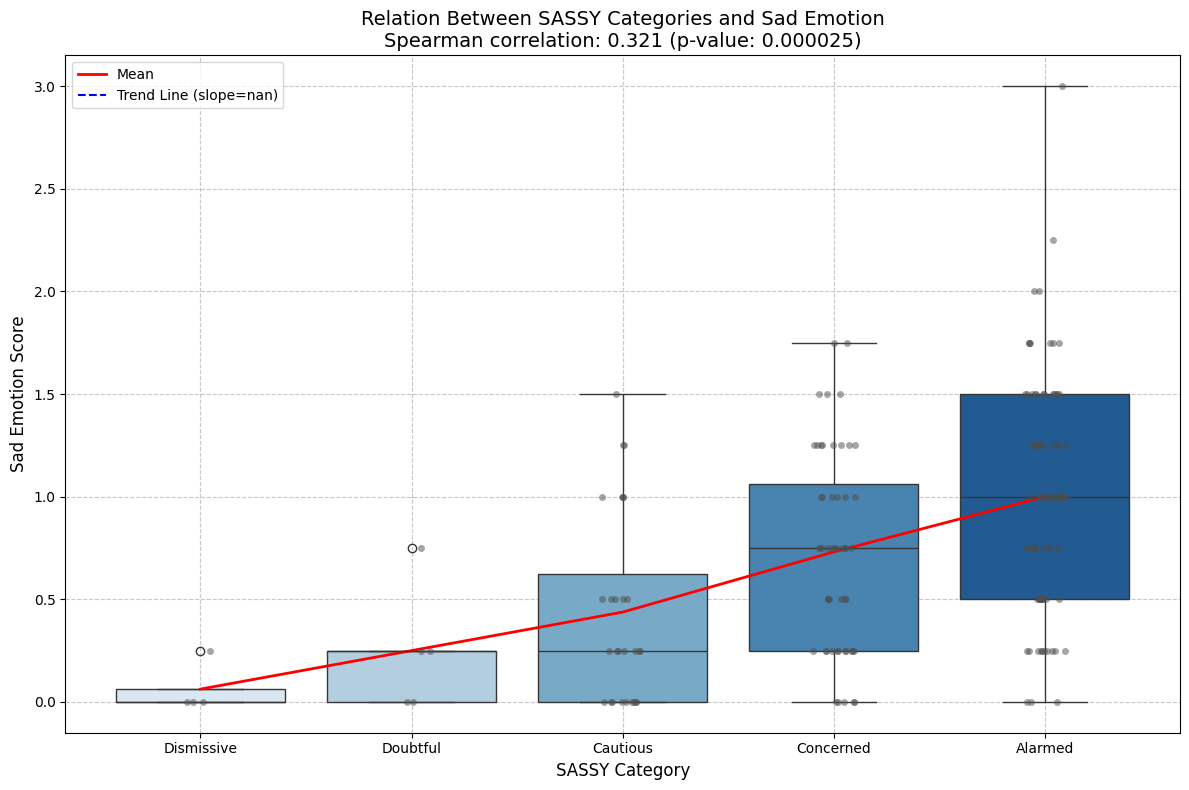

C:\Users\Hailey Sherman\AppData\Local\Temp\ipykernel_15620\2982639647.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='SASSY', y='sad', data=emotions_mean_by_ida,


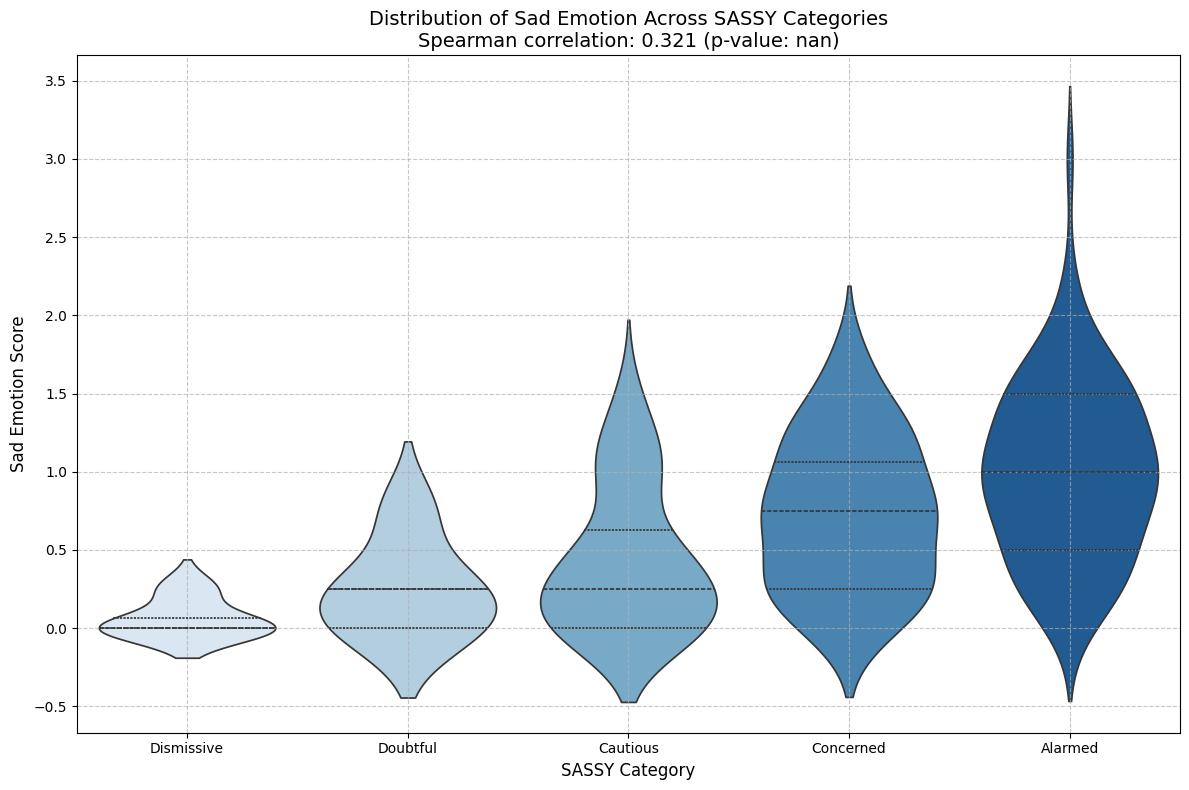

In [125]:
#plot emotion vs Sassy

# Setup the figure with a larger size for better visibility
plt.figure(figsize=(12, 8))

# Create a box plot to show distribution of 'sad' across SASSY categories
ax = sns.boxplot(x='SASSY', y='sad', data=emotions_mean_by_ida, 
                 order=['Dismissive', 'Doubtful', 'Cautious', 'Concerned', 'Alarmed'],
                 palette='Blues')

# Add individual data points for more detail (jittered to avoid overlap)
sns.stripplot(x='SASSY', y='sad', data=emotions_mean_by_ida,
              order=['Dismissive', 'Doubtful', 'Cautious', 'Concerned', 'Alarmed'],
              jitter=True, size=5, color='0.3', alpha=0.5)

# Calculate the mean for each category to add a line connecting them
means = emotions_mean_by_ida.groupby('SASSY')['sad'].mean().reindex(['Dismissive', 'Doubtful', 'Cautious', 'Concerned', 'Alarmed'])
x_positions = range(len(means))
plt.plot(x_positions, means.values, 'r-', linewidth=2, label='Mean')

# Add correlation information to the plot
corr_value = 0.321  # From your results
p_value = 0.000025   # From your results

# Add a title with correlation information
plt.title(f'Relation Between SASSY Categories and Sad Emotion\nSpearman correlation: {corr_value:.3f} (p-value: {p_value:.6f})', 
          fontsize=14)

# Label the axes
plt.xlabel('SASSY Category', fontsize=12)
plt.ylabel('Sad Emotion Score', fontsize=12)

# Add a trend line (regression line)
# Get numeric codes for categories (0, 1, 2, 3, 4)
numeric_sassy = emotions_mean_by_ida['SASSY'].cat.codes
slope, intercept, r_value, p_value, std_err = stats.linregress(numeric_sassy, emotions_mean_by_ida['sad'])
x_line = np.array([0, 1, 2, 3, 4])
y_line = intercept + slope * x_line
plt.plot(x_line, y_line, 'b--', label=f'Trend Line (slope={slope:.3f})')

# Add a legend
plt.legend()

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

# Alternative: If you want a violin plot to see distribution better
plt.figure(figsize=(12, 8))
sns.violinplot(x='SASSY', y='sad', data=emotions_mean_by_ida,
               order=['Dismissive', 'Doubtful', 'Cautious', 'Concerned', 'Alarmed'],
               palette='Blues', inner='quartile')
plt.title(f'Distribution of Sad Emotion Across SASSY Categories\nSpearman correlation: {corr_value:.3f} (p-value: {p_value:.6f})', 
          fontsize=14)
plt.xlabel('SASSY Category', fontsize=12)
plt.ylabel('Sad Emotion Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Urban/Rural vs Avg Emotions

In [126]:
# Run spearman test on sassy vs average emots
spearman_results = []
for emotion in emotion_cols:

    # Drop any rows with missing values
    data_subset = emotions_mean_by_ida[[emotion, 'rural/urban']].dropna()

    # Perform Spearman rank correlation test
    spearman_corr, spearman_p = stats.spearmanr(data_subset['rural/urban'], data_subset[emotion])
    
    spearman_results.append({
        'emotion': emotion,
        'spearman_corr': spearman_corr,
        'spearman_p': round(spearman_p, 6),  # Round to 6 decimal places
        'significant': spearman_p < 0.05
    })

# Create DataFrame and sort by p-value (ascending)
spearman_results_df_urb_rur = pd.DataFrame(spearman_results)
spearman_results_df_urb_rur = spearman_results_df_urb_rur.sort_values(by='spearman_p')
display(spearman_results_df_urb_rur)

,emotion,spearman_corr,spearman_p,significant
9,numb,-0.069297,0.353948,False
7,inspired,0.059214,0.428464,False
0,afraid_scared,0.058039,0.437702,False
5,hopeless,-0.057791,0.439666,False
10,optimistic_hopeful,0.053412,0.475159,False
1,angry_frustrated,-0.035151,0.638517,False
12,stressed,0.025093,0.737391,False
8,interested,0.023908,0.749376,False
4,happy,0.023173,0.756830,False
2,anxious,0.015650,0.834366,False


### UT vs Avg Emotions

In [127]:
# Mann-Whitney U test to compare emotions between Utah and non-utah residents
mw_ut_results = []
for emotion in emotion_cols:

    #Get emotion scores for ut and non ut
    ut_scores = emotions_mean_by_ida.loc[emotions_mean_by_ida['UT?'] == 1.0, emotion].dropna()
    non_ut_scores = emotions_mean_by_ida.loc[emotions_mean_by_ida['UT?'] == 0.0, emotion].dropna()
    # Perform Mann-Whitney U test
    stat, p_value = stats.mannwhitneyu(ut_scores, non_ut_scores, alternative='two-sided')
    
    mw_ut_results.append({
        'emotion': emotion,
        'statistic': stat,
        'p_value': p_value,
        'significant': p_value < 0.05
    })

mw_ut_results_df = pd.DataFrame(mw_ut_results)
display(mw_ut_results_df)

,emotion,statistic,p_value,significant
0,afraid_scared,3501.0,0.515199,False
1,angry_frustrated,3471.5,0.459272,False
2,anxious,3415.5,0.364844,False
3,guilty,3327.5,0.233717,False
4,happy,3972.0,0.445248,False
5,hopeless,3690.5,0.937397,False
6,indifferent,3973.0,0.381182,False
7,inspired,3779.0,0.854018,False
8,interested,3807.5,0.786680,False
9,numb,3466.5,0.419478,False
